## CHEME 6880 Homework 3 
Net ID : AF626

### Problem 1 
(Please feel free to use any machine learning software package for this problem)
Consider the data set of Problem 2 in HW #1 (on regression). Please develop the following
regression models to predict the value of y for x=0.7.<br>
(a) Support vector regression<br>
(b) Random forest<br>
(c) AdaBoost<br>
(d) Regression tree<br>
(e) Gradient boosting<br>
(f) XGBoost<br>

##### Solution

In [ ]:
# Install necessary libraries
# %pip install numpy
# %pip install sklearn.svm
# %pip install sklearn.ensemble
# %pip install sklearn.tree
# %pip install xgboost

In [12]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import matplotlib.pyplot as plt

# Importing the required data as dataframe
data_1 = pd.DataFrame(pd.read_csv('data/data_1.csv'))
x = data_1[['x']]
y = data_1['y']

# Initializing the differeent Models
models = {
    'Support Vector Regression': SVR(), # Default Kernel : Radial Basis Function (RBF)
    'Random Forest': RandomForestRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Regression Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(objective ='reg:squarederror')
}

# Creating an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['predicted_y'], index=models.keys())

# Predicting the value of y for x=0.7
x_test = [[0.7]]

# Storing the predicted values in the DataFrame
for name, model in models.items():
    model.fit(x, y)
    results_df.loc[name, 'predicted_y'] = model.predict(x_test)[0]

# Displaying the results DataFrame
print(results_df)


c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


                          predicted_y
Support Vector Regression   -2.969096
Random Forest               -2.976859
AdaBoost                      -2.9746
Regression Tree                -3.116
Gradient Boosting           -3.115718
XGBoost                     -3.113697


c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


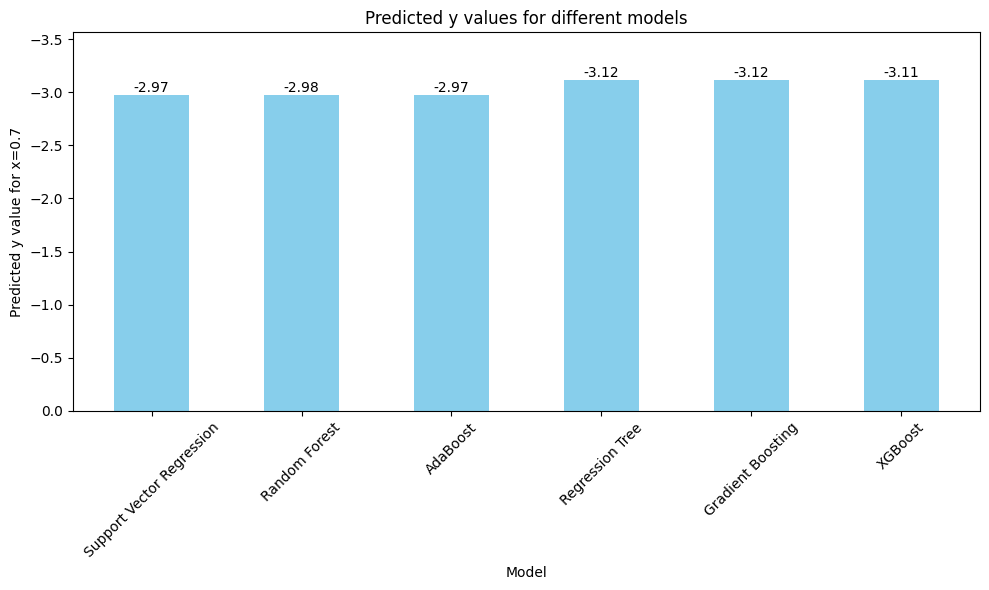

In [15]:
# Plotting the predicted y values
plt.figure(figsize=(10, 6))
bars = plt.bar(results_df.index, results_df['predicted_y'], color='skyblue', width=0.5)
plt.ylim(0, max(results_df['predicted_y']) * 1.2) # Adjusting y-axis scale
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Predicted y value for x=0.7')
plt.title('Predicted y values for different models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Problem 2
(Please feel free to use any machine learning software package for this problem)
Consider the data set of Problem 1 in HW #2 (on classification). Please develop the following
classification models to make prediction for the approval outcome of the same new application
from an unemployed, senior applicant with excellent credit rating and high available credit.<br>
(a) Random forest<br>
(b) AdaBoost<br>
(c) Gradient boosting<br>
(d) XGBoost<br>

##### Solution

In [43]:
# Importing necessary libararies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

# Reading data for problem set 2 as dataframe
data_2 = pd.read_csv('data/data_2.csv')

# Convert categorical variables using the provided encoding in HW2
encoding = {
    'Employment Status': {'Unemployed': 0, 'Employed': 1},
    'Credit Rating': {'Excellent': 1, 'Fair': 0},
    'Available Credit': {'High': 2, 'Medium': 1, 'Low': 0},
    'Age': {'Senior': 2, 'Middle Age': 1, 'Young': 0},
    'Approve Application ?': {'No': 0, 'Yes': 1}
}

data_2.replace(encoding, inplace=True)

# Split features and target variable
X = data_2.drop('Approve Application ?', axis=1)
y = data_2['Approve Application ?']

# Initializing the different models
models = {
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(objective='binary:logistic')
}

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models
for name, model in models.items():
    model.fit(X_train, y_train)

# New application data (unemployed, senior, excellent credit rating, high available credit)
new_application = pd.DataFrame({
    'Employment Status': [0],  # Unemployed
    'Credit Rating': [1],  # Excellent
    'Available Credit': [2],  # High
    'Age': [2]  # Senior
})

# Predicting the approval outcome for the new application
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(new_application)

# Displaying the predictions
for name, pred in predictions.items():
    print(f'Predicted approval outcome using {name}: {"Yes" if pred[0] == 1 else "No"}')

Predicted approval outcome using Random Forest: Yes
Predicted approval outcome using AdaBoost: Yes
Predicted approval outcome using Gradient Boosting: Yes
Predicted approval outcome using XGBoost: No


### Problem 3
(Please feel free to use any machine learning software package for this problem)
Consider the data set of Problem 5 in HW #2 (on classification via SVM). Please develop the
following classification models to predict the outcome for [1.5 1.5 1.5].<br>
(a) Random forest <br>
(b) AdaBoost<br>
(c) Gradient boosting<br>
(d) XGBoost<br>

##### Solution

In [42]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Reading the data from CSV file into a pandas DataFrame
data_3 = pd.read_csv('data/data_3.csv')

# Separate features (X1, X2, X3) and target variable (Y)
X = data_3[['X1', 'X2', 'X3']]
y = data_3['Y']

# Convert categorical labels ('Yes' and 'No') into numerical values (1 and 0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Initializing the different classification models
models = {
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(objective='binary:logistic')
}

# Train the models
for name, model in models.items():
    model.fit(X, y)

# New input data [1.5, 1.5, 1.5]
new_input = pd.DataFrame({'X1': [1.5], 'X2': [1.5], 'X3': [1.5]})

# Predict the outcome for the new input using each model
predictions = {}
for name, model in models.items():
    predictions[name] = label_encoder.inverse_transform(model.predict(new_input))

# Display the predictions
for name, pred in predictions.items():
    print(f'Predicted outcome using {name}: {pred[0]}')

Predicted outcome using Random Forest: Yes
Predicted outcome using AdaBoost: Yes
Predicted outcome using Gradient Boosting: Yes
Predicted outcome using XGBoost: Yes


### Problem 4
Perform dimensionality reduction using principle component analysis (PCA) on the dataset in the
file “hw3-data-TE.xlsx”. The dataset includes 500 data samples, each of which has 33
dimensions/variables (d1 to d33). Please first preprocess the data, such that all input variables are
scaled to zero mean and unit variance. Next, perform singular value decomposition (SVD) on
the covariance matrix of the normalized data. Please answer the following questions using the
principal component (PC) vectors and corresponding eigenvalues obtained from SVD.<br>
(a) What is the minimum number of principal components (PCs) that are required to capture
95% of the total variations of the data in ℝ33?<br>
(b) What is the projection of the 5th data sample (in the original dataset) on the PC with the
largest eigenvalue? [hint: please use the “normalized” value of the 5th data sample]

##### Solution

In [55]:
import pandas as pd
data_4 = pd.read_csv('data/data_4.csv')
data_4.head(5)

,Data Sample No.,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d24,d25,d26,d27,d28,d29,d30,d31,d32,d33
0,1,0.24987,3642.6,4539.6,9.2784,27.200,42.248,2704.2,75.492,120.40,...,53.617,24.708,62.265,22.224,39.724,41.975,50.223,47.411,41.093,18.351
1,2,0.25118,3694.8,4513.8,9.2831,27.077,42.736,2705.4,74.628,120.41,...,53.926,24.579,61.306,21.975,40.249,34.187,44.741,47.442,41.303,19.831
2,3,0.25185,3683.5,4504.9,9.4600,26.987,42.245,2705.2,74.315,120.42,...,54.032,24.521,60.532,21.640,40.003,43.628,46.032,47.574,41.520,20.426
3,4,0.25147,3653.9,4531.9,9.3462,26.983,42.656,2706.3,75.487,120.39,...,53.708,24.558,61.496,22.324,40.161,37.967,43.903,47.606,41.284,19.568
4,5,0.24107,3629.3,4527.0,9.3406,27.041,42.520,2705.6,75.332,120.38,...,53.259,24.024,60.781,22.506,40.962,34.247,48.037,47.585,40.949,17.063


In [56]:
# Sacling the input data to zero mean and unit variance
# Separate the Sample No. column
sample_numbers = data_4['Data Sample No.']
data = data_4.drop(columns=['Data Sample No.'])

# scale the data to have zero mean and unit variance
scaled_data = (data - data.mean()) / data.std()
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
scaled_df['Data Sample No.'] = sample_numbers

# The sacled input is as follows:
scaled_df

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,...,d25,d26,d27,d28,d29,d30,d31,d32,d33,Data Sample No.
0,-0.044401,-0.653661,0.885207,-0.861360,1.400405,-0.410481,-0.227496,0.960375,0.030020,0.197452,...,-0.004696,0.795260,-0.068298,-0.248827,1.211723,1.575293,-0.023624,-0.003330,0.090802,1
1,0.001481,0.975980,0.071957,-0.799933,0.810940,1.797914,0.000494,-0.675350,0.566090,-0.170456,...,-0.050358,-0.013818,-0.670200,0.116256,-1.347466,-0.752507,-0.009022,0.396246,1.085388,2
2,0.024947,0.623204,-0.208583,1.512065,0.379625,-0.424057,-0.037504,-1.267921,1.102160,0.001520,...,-0.070888,-0.666817,-1.479989,-0.054811,1.754909,-0.204315,0.053153,0.809141,1.485239,3
3,0.011638,-0.300884,0.642493,0.024754,0.360455,1.435882,0.171487,0.950909,-0.506050,-0.109709,...,-0.057791,0.146479,0.173430,0.055062,-0.105333,-1.108344,0.068226,0.360094,0.908648,4
4,-0.352618,-1.068876,0.488038,-0.048436,0.638414,0.820428,0.038492,0.657463,-1.042120,0.923857,...,-0.246810,-0.456743,0.613375,0.612074,-1.327750,0.647061,0.058334,-0.277325,-0.774757,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.551909,-1.043901,-0.460753,-0.426145,-1.082056,1.268443,-2.355404,0.352658,-1.578190,0.687711,...,-0.511223,-0.649100,-2.127820,0.185101,-2.730900,1.425825,0.468124,-0.992755,0.637824,496
496,0.919827,-1.199997,-0.114019,-0.903183,0.312531,-0.767988,-2.279408,-1.252775,0.030020,0.072534,...,1.044818,0.386081,-1.646781,0.447265,-0.276537,0.703111,0.521349,-0.062315,0.872359,497
497,0.968862,-0.588101,-0.460753,-0.164754,0.523397,0.738971,-1.994420,-1.235737,1.102160,0.038310,...,0.995971,-1.177236,-0.786230,0.480644,-0.157581,-0.490088,0.566567,0.139376,0.055857,498
498,-0.031092,1.896946,-0.177062,1.079464,-0.880775,1.417781,-1.652435,-1.360688,1.638229,-2.156305,...,0.002738,0.424890,-1.620191,-1.755056,1.136800,-1.149108,0.708816,1.813788,-0.934698,499


In [57]:
import pandas as pd
import numpy as np

scaled_data = scaled_df

# Dropping the 'Data Sample No.' column before performing SVD
scaled_data = scaled_data.drop(columns=['Data Sample No.'])

# Computing the covariance matrix of the normalized data manually
n = scaled_data.shape[0]
covariance_matrix = np.dot(scaled_data.T, scaled_data) / n

# Perform Singular Value Decomposition (SVD) on the covariance matrix manually
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sorting eigenvalues and corresponding eigenvectors in descending order to select the most prominent one
sorted_indices = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Display the singular values (eigenvalues)
print("Singular values (eigenvalues):")
print(eigenvalues)

# Display the left singular vectors (principal components)
print("Left singular vectors (principal components):")
print(eigenvectors)

Singular values (eigenvalues):
[5.39750324e+00 3.16510613e+00 2.60981316e+00 2.18632781e+00
 2.04219873e+00 2.00157893e+00 1.86616721e+00 1.52987871e+00
 1.48713060e+00 1.24074489e+00 1.08661261e+00 1.06078891e+00
 9.97635537e-01 9.28645420e-01 8.83385268e-01 8.23397334e-01
 7.80831295e-01 6.38019728e-01 6.02950663e-01 4.48724269e-01
 4.02651865e-01 3.26433797e-01 2.37528969e-01 8.82716030e-02
 4.74136054e-02 2.50399737e-02 1.32239692e-02 9.08997819e-03
 3.87269952e-03 2.94412821e-03 8.88937442e-05 4.92516427e-08
 3.87224007e-08]
Left singular vectors (principal components):
[[-1.64427354e-03  3.49043801e-02  3.52585827e-01 ... -1.08206134e-02
   9.58673192e-06 -5.29297101e-05]
 [ 4.47513096e-02 -1.82180753e-01  1.58491226e-01 ... -4.14887387e-04
   9.59710618e-06  1.11745729e-05]
 [ 9.00106911e-02  4.06699841e-02  9.66973912e-03 ...  1.63884418e-04
   1.41546561e-06  7.38390496e-06]
 ...
 [-2.55005262e-01 -3.69232595e-01 -9.21097270e-02 ... -3.10444655e-02
   2.85383816e-05  6.5738836

In [58]:
# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(eigenvalues) / np.sum(eigenvalues)

# Find the number of principal components needed to capture 95% of the total variance
min_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print(f"Minimum number of principal components required to capture 95% of total variance: {min_components}")


Minimum number of principal components required to capture 95% of total variance: 19


In [59]:
# Extract the 5th data sample (normalized)
sample_5_normalized = scaled_data.iloc[4].values  # Indexing is 0-based

# Project the normalized sample onto the principal components
projection = np.dot(sample_5_normalized, eigenvectors[:, 0])

print(f"Projection of the 5th data sample on the PC with the largest eigenvalue: {projection}")

Projection of the 5th data sample on the PC with the largest eigenvalue: -0.5115145098789611


### Problem 5
(Please feel free to use any machine learning software package for this problem)
Consider the data set of Problem 5 in HW #2 (on classification via SVM). Please develop the
following classification models to predict the outcome for [1.5 1.5 1.5].<br>
(a) Random forest <br>
(b) AdaBoost<br>
(c) Gradient boosting<br>
(d) XGBoost<br>

##### Solution

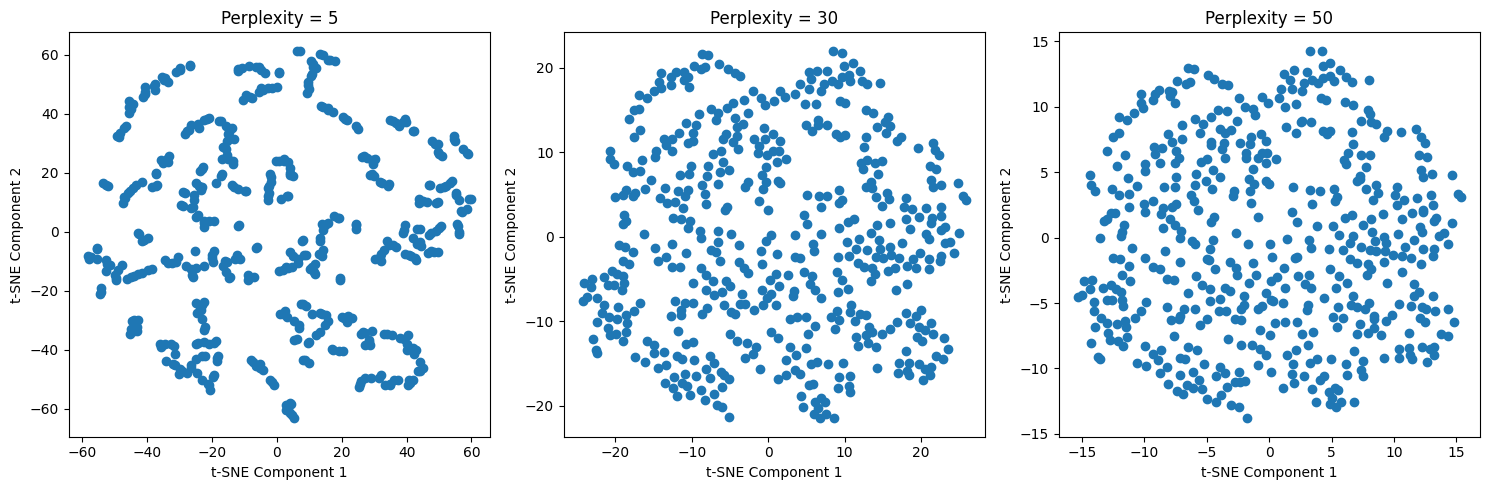

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Read the data for problem 5
data_5 = pd.read_csv('data/data_4.csv')

# Separate features from the data
X = data_5.drop(columns=['Data Sample No.'])

# Define perplexity values
perplexities = [5, 30, 50]

# Applying t-SNE with different perplexity values and visualize the reduced-dimensional data
plt.figure(figsize=(15, 5))

for i, perplexity in enumerate(perplexities, 1):
    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_embedded = tsne.fit_transform(X)
    
    # Visualize the reduced-dimensional data
    plt.subplot(1, 3, i)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
    plt.title(f"Perplexity = {perplexity}")
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()